# Identifying meanings using BERT


Import python resources

In [1]:
import pandas as pd
import numpy as np
!pip install  git+https://github.com/negedng/bert-embedding
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import LeaveOneOut
from sklearn import model_selection
import matplotlib.pyplot as plt
%matplotlib inline


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/negedng/bert-embedding to /tmp/pip-req-build-jl3qtiov
  Running command git clone -q https://github.com/negedng/bert-embedding /tmp/pip-req-build-jl3qtiov
     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 49.1 MB 1.2 MB/s 
     |████████████████████████████████| 344 kB 64.6 MB/s 
  Created wheel for bert-embedding: filename=bert_embedding-1.0.1-py3-none-any.whl size=13269 sha256=8c741a35db8bd76e13c979274857c6e37024944df5894a6214cafee1e9c0f9a0
  Stored in directory: /tmp/pip-ephem-wheel-cache-_jsqyxlc/wheels/5f/2f/02/a013bf151ace206bf43b23605f1708f72ac1d33a6f2ec90219
  Created wheel for gluonnlp: filename=gluonnlp-0.10.0-cp37-cp37m-linux_x86_64.whl size=595732 sha256=5fffedba6a8b8c043a5ae99b691c977725229e03d142f1a3cb711df93432051f
  Stored in directory: /root/.cache/pip/wheels/be/b4/06/7f3fdfaf707e6b5e98b79c041e023a

Load The training Dataset

In [2]:
df1 = pd.read_csv('Traffic VI D.csv')
df1

,Sentence,Type
0,never again are you going to have hassles gett...,1
1,everyone is hunting everywhere for website tra...,1
2,have you been currently needing more website t...,1
3,we understand how to get targeted traffic and ...,1
4,really great news is the fact i can show you h...,1
5,proven methods to initiate almost endless pros...,1
6,practically never again are you going to exper...,1
7,the most convenient strategy to mend your own ...,1
8,i want to share with you great options that wo...,1
9,how to search for tremendous web site traffic ...,1


In [3]:
! pip install bert-embedding
from bert_embedding  import BertEmbedding
bert_embedding = BertEmbedding(max_seq_length=50)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Vocab file is not found. Downloading.


Generate BERT embedding for every token of every sentence

In [9]:
embs = bert_embedding(df1['Sentence'], filter_spec_tokens=False,)

Select a word to use the embeddings with

In [10]:
word_embs = []
for row in embs:
    try:
        word_index = row[0].index('traffic')
        word_embs.append(row[1][word_index])
    except ValueError:
        print('Skipped')

In [11]:
word_embs = np.array(word_embs)
word_embs.shape

(48, 768)

PCA projection to 2D

In [12]:
word_pca = PCA(n_components=2).fit_transform(word_embs)
word_pca.shape

(48, 2)

Plot the results (group to classes)

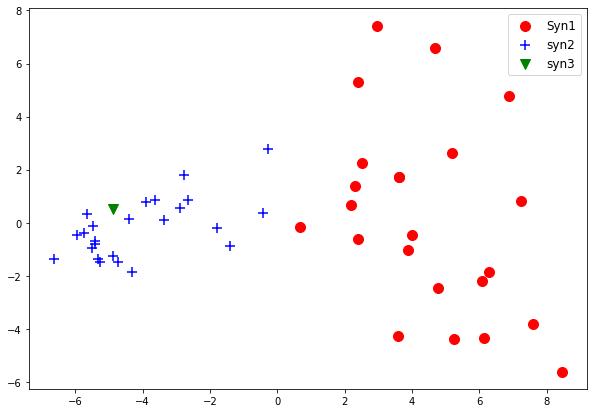

In [13]:
cdict = {0: 'red', 1: 'blue', 2: 'green'}
markers = {0: 'o', 1: '+', 2: 'v'}
labels = {0: 'Syn1', 1: 'syn2', 2: 'syn3'}

scatter_x = word_pca[:,0]
scatter_y = word_pca[:,1]
fig, ax = plt.subplots(figsize=(10, 7))
for g in np.unique(df1.Type):
    ix = np.where(df1.Type == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = labels[g], s=100, marker=markers[g])
ax.legend(prop={'size': 12})
plt.show()

Evaluate a k-NN (k-Nearest Neighbour Classifier) model with LOOCV (Leave One Out Cross-Validation)

In [14]:
loocv = model_selection.LeaveOneOut()
model = KNeighborsClassifier(n_neighbors=8)
results = model_selection.cross_val_score(model, word_embs, df1.Type, cv=loocv)

In [15]:
model.fit(word_embs,df1.Type)


KNeighborsClassifier(n_neighbors=8)

In [25]:
def take_embs(embs):
  test_embs = []
  for row in embs:
      try:
          test_index = row[0].index('traffic') # change the word 
          test_embs.append(row[1][test_index])
      except ValueError:
          print("Skipped")
  return test_embs       

In [17]:
def pipeline(rawdata):
  try:
    a_list=[]
    a_list.insert(0,rawdata)
    data = bert_embedding(a_list, filter_spec_tokens=False,)
    data = take_embs(data)
    processed_data = model.predict(data)
    return processed_data[0]
  except ValueError:
      return 2

  

In [28]:
pipeline("I have stucked in traffic")


0

In [27]:
pipeline("Social Media traffic")

1